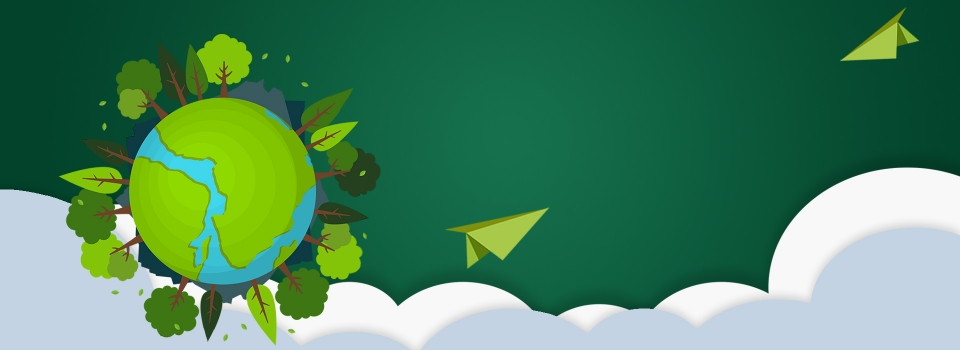

<center>
    
    
 ### Singapore Data Analysis - A Data Camp Certification Project
    
___

<center>

##### Pablo de la Asunción Cumbrera Conde

### Índice
 - Introducción

 - Dataset y Librerías
 - Limpieza de Datos y Preprocesamiento
 - Extracción de Features y unión de los Data Frame
 - Cálculo de resultados
 - Conclusiones

#### Introducción
___ 

## Energy saved from recycling
<p>Did you know that recycling saves energy by reducing or eliminating the need to make materials from scratch? For example, aluminum can manufacturers can skip the energy-costly process of producing aluminum from ore by cleaning and melting recycled cans. Aluminum is classified as a non-ferrous metal.</p>
<p>Singapore has an ambitious goal of becoming a zero-waste nation. The amount of waste disposed of in Singapore has increased seven-fold over the last 40 years. At this rate, Semakau Landfill, Singapore’s only landfill, will run out of space by 2035. Making matters worse, Singapore has limited land for building new incineration plants or landfills.</p>
<p>The government would like to motivate citizens by sharing the total energy that the combined recycling efforts have saved every year. They have asked you to help them.</p>
<p>You have been provided with three datasets. The data come from different teams, so the names of waste types may differ.</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:16px"><b>datasets/wastestats.csv - Recycling statistics per waste type for the period 2003 to 2017</b>
    </div>
    <div>Source: <a href="https://www.nea.gov.sg/our-services/waste-management/waste-statistics-and-overall-recycling">Singapore National Environment Agency</a></div>
<ul>
    <li><b>waste_type: </b>The type of waste recycled.</li>
    <li><b>waste_disposed_of_tonne: </b>The amount of waste that could not be recycled (in metric tonnes).</li>
    <li><b>total_waste_recycle_tonne: </b>The amount of waste that could be recycled (in metric tonnes).</li>
    <li><b>total_waste_generated: </b>The total amount of waste collected before recycling (in metric tonnes).</li>
    <li><b>recycling_rate: </b>The amount of waste recycled per tonne of waste generated.</li>
    <li><b>year: </b>The recycling year.</li>
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/2018_2019_waste.csv - Recycling statistics per waste type for the period 2018 to 2019</b>
    </div>
    <div> Source: <a href="https://www.nea.gov.sg/our-services/waste-management/waste-statistics-and-overall-recycling">Singapore National Environment Agency</a></div>
<ul>
    <li><b>Waste Type: </b>The type of waste recycled.</li>
    <li><b>Total Generated: </b>The total amount of waste collected before recycling (in thousands of metric tonnes).</li> 
    <li><b>Total Recycled: </b>The amount of waste that could be recycled. (in thousands of metric tonnes).</li>
    <li><b>Year: </b>The recycling year.</li>
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/energy_saved.csv -  Estimations of the amount of energy saved per waste type in kWh</b>
    </div>
<ul>
    <li><b>material: </b>The type of waste recycled.</li>
    <li><b>energy_saved: </b>An estimate of the energy saved (in kiloWatt hour) by recycling a metric tonne of waste.</li> 
    <li><b>crude_oil_saved: </b>An estimate of the number of barrels of oil saved by recycling a metric tonne of waste.</li>
</ul>

</div>
<pre><code>
</code></pre>

#### Librerias y Data Frames
___

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Primer DF 2003 - 2017

waste_one = pd.read_csv('file:///C:/Users/pablo/Data%20Science/RawData/wastestats.csv')
print(waste_one.shape)
waste_one = waste_one.sort_values('year', ascending=False)
waste_one.head(10)

(225, 6)


,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
224,Total,2980000,4724300.0,7704300,0.61,2017
223,"Others (stones, ceramic, rubber, etc.)",319300,7100.0,326400,0.02,2017
222,Textile/Leather,141200,9600.0,150800,0.06,2017
221,Plastic,763400,51800.0,815200,0.06,2017
220,Ash and sludge,214800,28600.0,243400,0.12,2017
219,Food,676800,133000.0,809800,0.16,2017
218,Glass,58900,12400.0,71300,0.17,2017
217,Paper/Cardboard,576000,568800.0,1144800,0.50,2017
216,Horticultural waste,107600,220700.0,328300,0.67,2017
215,Wood,97300,326800.0,424100,0.77,2017


In [4]:
#Segundo DF 2018 - 2019

waste_two = pd.read_csv('file:///C:/Users/pablo/Data%20Science/RawData/2018_2019_waste.csv')
print(waste_two.shape)
waste_two.head(10)

(30, 4)


,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
0,Construction& Demolition,1440,1434,2019
1,Ferrous Metal,1278,1270,2019
2,Paper/Cardboard,1011,449,2019
3,Plastics,930,37,2019
4,Food,7440,136,2019
5,Wood,438,289,2019
6,Horticultural,400,293,2019
7,Ash & Sludge,252,25,2019
8,Textile/Leather,168,6,2019
9,Used Slag,129,127,2019


In [5]:
# Tercer DF

energy_saved = pd.read_csv('file:///C:/Users/pablo/Data%20Science/RawData/energy_saved.csv')
print(energy_saved.shape)
energy_saved.head(10)

(5, 6)


,The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram) per waste type,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1 barrel oil is approximately 159 litres of oil,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,material,Plastic,Glass,Ferrous Metal,Non-Ferrous Metal,Paper
3,energy_saved,5774 Kwh,42 Kwh,642 Kwh,14000 Kwh,4000 kWh
4,crude_oil saved,16 barrels,NaN,1.8 barrels,40 barrels,1.7 barrels


#### Limpieza Formatos y Preprocesamiento
___

In [6]:
# Ponemos en minúsculas los nombres de las columnas y cambiamos los nombres para que encagen después
waste_one.columns = waste_one.columns.str.lower()
waste_two.columns = waste_two.columns.str.lower()
energy_saved.columns = energy_saved.columns.str.lower()

In [7]:
#Cambios en primer DF:
#waste_one['total recycled (tonnes)'] = waste_one['total_waste_recycled_tonne'].values //1000
waste_one = waste_one.drop(['waste_disposed_of_tonne', 'total_waste_generated_tonne','recycling_rate'], axis=1)
waste_one.columns = ['waste_type','total recycled (tonnes)', 'year']

In [8]:
#Cambios en segundo DF:
waste_two.columns = ['waste_type','total generated (tonnes)','total recycled (tonnes)','year']
waste_two['total recycled (tonnes)'] = waste_two['total recycled (tonnes)'].values *1000
waste_two = waste_two.drop(['total generated (tonnes)'], axis=1)

In [9]:
# Tercer DF:
df_three ={'material':['Plastic','Glass','Ferrous Metal','Non-Ferrous Metal','Paper'],'energy_saved':[5574,42,642,14000,4000]}
df_three= pd.DataFrame(df_three)
df_three=df_three.drop(4,axis=0)
df_three

,material,energy_saved
0,Plastic,5574
1,Glass,42
2,Ferrous Metal,642
3,Non-Ferrous Metal,14000


#### Extracción de features y unión de los Data Frame
___

In [10]:
# Primer DF

#Eliminamos todas las columnas anteriores a 2015

waste_one = waste_one.drop(waste_one[waste_one['year'] < 2015].index)
waste_one.shape

(45, 3)

In [11]:
# Nombre columnas target
print(waste_one['waste_type'][2])
print(waste_one['waste_type'][6])
print(waste_one['waste_type'][7])
print(waste_one['waste_type'][10])

Plastics
Ferrous metal
Non-ferrous metal
Glass


In [12]:
glass = waste_one.drop(waste_one[waste_one['waste_type'] !='Glass'].index)
plastic = waste_one.drop(waste_one[waste_one['waste_type'] != 'Plastics'].index)
ferrous = waste_one.drop(waste_one[waste_one['waste_type'] !='Ferrous metal'].index)
nonferrous = waste_one.drop(waste_one[waste_one['waste_type'] !='Non-ferrous metal'].index)
df_one = glass.append(plastic.append(ferrous.append(nonferrous)))
df_one = df_one.sort_values('waste_type')

In [13]:
#Buscamos un valor para plastic y nfm que no se encuentran en el df
value_plastic =waste_one.drop(waste_one[waste_one['waste_type'] != 'Plastic'].index)
print(value_plastic.shape)
value_nfm = waste_one.drop(waste_one[waste_one['waste_type'] != 'Non-ferrous metals'].index)
print(value_nfm.shape)
df_one = df_one.append(value_plastic.append(value_nfm))

(1, 3)
(1, 3)


In [14]:
# Primer DF completo
df_one = df_one.sort_values('year', ascending=True)
df_one = df_one.set_index('year')
df_one['total recycled (tonnes)'] = df_one['total recycled (tonnes)'].values.astype(int)
####Primer DF
df_one

,waste_type,total recycled (tonnes)
year,,
2015,Ferrous metal,1333300
2015,Glass,14600
2015,Non-ferrous metal,160400
2015,Plastics,57800
2016,Ferrous metal,1351500
2016,Glass,14700
2016,Non-ferrous metal,95900
2016,Plastics,59500
2017,Ferrous metal,1371000


In [15]:
# Realizamos las mismas operaciones para el segundo data frame
glass2 = waste_two.drop(waste_two[waste_two['waste_type'] !='Glass'].index)
plastic2 = waste_two.drop(waste_two[waste_two['waste_type'] != 'Plastics'].index)
ferrous2 = waste_two.drop(waste_two[waste_two['waste_type'] !='Ferrous Metal'].index)
nonferrous2 = waste_two.drop(waste_two[waste_two['waste_type'] !='Non-Ferrous Metal'].index)
df_two = glass2.append(plastic2.append(ferrous2.append(nonferrous2)))
df_two = df_two.sort_values('year')
df_two = df_two.set_index('year')


### SEGUNDO DF
df_two

,waste_type,total recycled (tonnes)
year,,
2018,Glass,12000
2018,Plastics,41000
2018,Ferrous Metal,126000
2018,Non-Ferrous Metal,170000
2019,Glass,11000
2019,Plastics,37000
2019,Ferrous Metal,1270000
2019,Non-Ferrous Metal,124000


In [17]:
target_data = df_one.append(df_two)
print(target_data.shape)
print(target_data.nunique())
target_data = target_data.sort_values('year')

### DF MERGED 
target_data

(20, 2)
waste_type                  8
total recycled (tonnes)    20
dtype: int64


,waste_type,total recycled (tonnes)
year,,
2015,Ferrous metal,1333300
2015,Glass,14600
2015,Non-ferrous metal,160400
2015,Plastics,57800
2016,Ferrous metal,1351500
2016,Glass,14700
2016,Non-ferrous metal,95900
2016,Plastics,59500
2017,Non-ferrous metals,92200


#### Cálculo de los resultados
___

In [18]:
#Valores de cada material

print(df_three)

            material  energy_saved
0            Plastic          5574
1              Glass            42
2      Ferrous Metal           642
3  Non-Ferrous Metal         14000


In [19]:
##PLASTIC

solp = target_data[target_data['waste_type'] == 'Plastics']
solp = solp.append(target_data[target_data['waste_type'] == 'Plastic'])
solp

,waste_type,total recycled (tonnes)
year,,
2015,Plastics,57800
2016,Plastics,59500
2018,Plastics,41000
2019,Plastics,37000
2017,Plastic,51800


In [20]:
solp['plastic'] = solp['total recycled (tonnes)'].values.astype(int) *5574
solp = solp.drop(['total recycled (tonnes)','waste_type'],axis=1)
solp

,plastic
year,
2015,322177200
2016,331653000
2018,228534000
2019,206238000
2017,288733200


In [21]:
#GLASS

solg = target_data[target_data['waste_type'] == 'Glass']
solg['glass'] = solg['total recycled (tonnes)'].values*42
solg

<ipython-input-21-44d8d77a215e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solg['glass'] = solg['total recycled (tonnes)'].values*42


,waste_type,total recycled (tonnes),glass
year,,,
2015,Glass,14600,613200
2016,Glass,14700,617400
2017,Glass,12400,520800
2018,Glass,12000,504000
2019,Glass,11000,462000


In [22]:
solg = solg.drop(['total recycled (tonnes)','waste_type'],axis=1)
solg

,glass
year,
2015,613200
2016,617400
2017,520800
2018,504000
2019,462000


In [24]:
## FERROUS METAL

solfm = target_data[target_data['waste_type'] == 'Ferrous Metal']
solfm = solfm.append(target_data[target_data['waste_type'] == 'Ferrous metal'])
solfm['fm'] = solfm['total recycled (tonnes)'].values *642
solfm

,waste_type,total recycled (tonnes),fm
year,,,
2018,Ferrous Metal,126000,80892000
2019,Ferrous Metal,1270000,815340000
2015,Ferrous metal,1333300,855978600
2016,Ferrous metal,1351500,867663000
2017,Ferrous metal,1371000,880182000


In [25]:
solfm = solfm.drop(['total recycled (tonnes)','waste_type'],axis=1)
solfm = solfm.sort_values('year')
solfm

,fm
year,
2015,855978600
2016,867663000
2017,880182000
2018,80892000
2019,815340000


In [26]:
## NON-FERROUS METAL

solnfm = target_data[target_data['waste_type'] == 'Non-Ferrous Metal']
solnfm = solnfm.append(target_data[target_data['waste_type'] == 'Non-ferrous metal'])
solnfm = solnfm.append(target_data[target_data['waste_type'] == 'Non-ferrous metals'])
solnfm['nfm'] = solnfm['total recycled (tonnes)'].values*14000
solnfm

,waste_type,total recycled (tonnes),nfm
year,,,
2018,Non-Ferrous Metal,170000,2380000000
2019,Non-Ferrous Metal,124000,1736000000
2015,Non-ferrous metal,160400,2245600000
2016,Non-ferrous metal,95900,1342600000
2017,Non-ferrous metals,92200,1290800000


In [27]:
solnfm = solnfm.drop(['total recycled (tonnes)','waste_type'],axis=1)
solnfm = solnfm.sort_values('year')
solnfm

,nfm
year,
2015,2245600000
2016,1342600000
2017,1290800000
2018,2380000000
2019,1736000000


In [28]:
df1 = pd.merge(solp,solg,left_index=True, right_index=True)
df2 = pd.merge(solfm,solnfm,left_index=True, right_index=True)
df3 = pd.merge(df1,df2,left_index=True, right_index=True)
df3 = df3.sort_values('year')
df3

,plastic,glass,fm,nfm
year,,,,
2015,322177200,613200,855978600,2245600000
2016,331653000,617400,867663000,1342600000
2017,288733200,520800,880182000,1290800000
2018,228534000,504000,80892000,2380000000
2019,206238000,462000,815340000,1736000000


In [29]:
print("2015: ", df3.iloc[0].sum())
print("2016: ",df3.iloc[1].sum())
print("2017: ",df3.iloc[2].sum())
print("2018: ",df3.iloc[3].sum())
print("2019: ",df3.iloc[4].sum())

total_energy_saved ={'year':['2015','2016','2017','2018','2019'],
                     'total_energy_saved':[df3.iloc[0].sum(),df3.iloc[1].sum(),df3.iloc[2].sum(),
                                          df3.iloc[3].sum(),df3.iloc[4].sum()]}

annual_energy_savings = pd.DataFrame(total_energy_saved)
annual_energy_savings = annual_energy_savings.set_index('year')
annual_energy_savings

2015:  3424369000
2016:  2542533400
2017:  2460236000
2018:  2689930000
2019:  2758040000


,total_energy_saved
year,
2015,3424369000
2016,2542533400
2017,2460236000
2018,2689930000
2019,2758040000


#### Conclusiones
___

- Mejorar orden en 

##########################################################################################################################
___